In [18]:
%load_ext autoreload
%autoreload 2
# import warnings 
# warnings.filterwarnings("ignore")

import os
os.chdir(r'C:\Users\leoca\Documents\ATIAM\PAM\GIT\deep-eurorack-control\src')
import numpy as np
from tqdm import tqdm
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import signal_envelope as se
import scipy.signal as ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
raw_data_dir = r'D:\NSYNTH\nsynth-train\audio'
dataset_dir = r'D:\NSYNTH\stringfull'
filter = 'string_acoustic'
sr = 16000
frame_size = 256
nb_files = 300

In [13]:
metrics_names = ["Loudness","Centroid","Bandwidth","Flatness","Rolloff"]

In [16]:
metrics_arr = preprocess_dataset_metrics(raw_data_dir,dataset_dir,filter,metrics_names,sr,frame_size,nb_files=None)

100%|████████████████████████████████████████████████████████████████████████████| 19390/19390 [11:46<00:00, 27.43it/s]


In [7]:
for entry in metrics_arr:
    for name in metrics_names:
        entry[name] = np.mean(entry[name])

NameError: name 'metrics_arr' is not defined

In [91]:
dataframe = pd.DataFrame(metrics_arr)
dataframe

,Loudness,Centroid,Bandwidth,Flatness,Rolloff
0,0.038928,685.538032,1295.017046,0.156945,1157.751465
1,0.038928,685.527595,1294.991521,0.156945,1157.751465
2,0.038928,685.527990,1294.993505,0.156945,1157.751465
3,0.038506,651.895429,1288.694203,0.132760,1016.589355
4,0.036658,655.455142,1286.327333,0.145236,1007.702637
...,...,...,...,...,...
10572,0.115314,3518.373443,2206.209428,0.001278,5434.399414
10573,0.115314,3518.384619,2206.226527,0.001278,5434.399414
10574,0.098497,3962.407539,2234.403759,0.002057,6241.125488
10575,0.086672,4167.780259,2225.718402,0.002224,6306.408691


NameError: name 'dataframe' is not defined

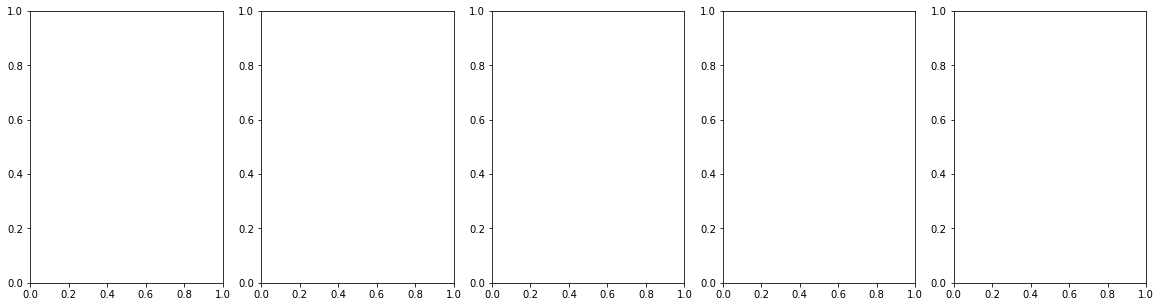

In [22]:
fig,axs = plt.subplots(1,len(metrics_names),figsize=(20,5))
for name,ax in zip(metrics_names,axs):
    dataframe[name].hist(ax=ax, bins=10)
    ax.set_title(name)
plt.show()
    
fig2 = plt.figure()
corrMatrix =dataframe.corr(method= "kendall")
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
def compute_metrics(curSignal,metrics_names):
    dataStruct = dict.fromkeys(metrics_names)
    dataStruct["Loudness"] = librosa.feature.rms(curSignal)
    # Compute the spectral centroid. [y, sr, S, n_fft, ...]
    dataStruct["Centroid"] = librosa.feature.spectral_centroid(curSignal)
    # Compute the spectral bandwidth. [y, sr, S, n_fft, ...]
    dataStruct["Bandwidth"] = librosa.feature.spectral_bandwidth(curSignal)
    # Compute spectral contrast [R16] , sr, S, n_fft, ...])	
    # dataStruct["Contrast"] = librosa.feature.spectral_contrast(curSignal)
    # Compute the spectral flatness. [y, sr, S, n_fft, ...]
    dataStruct["Flatness"] = librosa.feature.spectral_flatness(curSignal)
    # Compute roll-off frequency
    dataStruct["Rolloff"] = librosa.feature.spectral_rolloff(curSignal)
    return (dataStruct)

In [8]:
def preprocess_dataset_metrics(raw_data_dir,dataset_dir,filter,metrics_names,sr,frame_size,nb_files):
    files= os.listdir(raw_data_dir) 
    os.makedirs(dataset_dir,exist_ok=True)
    audio_files = []
    for file in files:
            if filter in file:
                audio_files.append(os.path.join(raw_data_dir,file))
                # break
    
        
    if nb_files is not None:
        audio_files=audio_files[:nb_files]
    
    
    metrics_arr = []
    for i,file in enumerate(tqdm(audio_files)): 
        signal,_ = librosa.load(file,sr)
        metrics_arr.append(compute_metrics(signal,metrics_names))
    return metrics_arr
#     nb_samples = len(audio_files)
#     nb_trames = int(len(librosa.load(audio_files[0],sr)[0])/frame_size)
#     loudness_arr = np.zeros((nb_samples,nb_trames,1))
#     pitch_arr = np.zeros((nb_samples,nb_trames,1))
#     audio_arr = np.zeros((nb_samples,nb_trames,frame_size))
    
    
#     for i,file in enumerate(tqdm(audio_files)):
#             signal,_ = librosa.load(file,sr)
#             pitch_arr[i] = get_pitch(signal,sr,frame_size).reshape(-1,1)
#             loudness_arr[i] = get_loudness(signal,sr,frame_size,n_fft=1024).reshape(-1,1)
#             audio_arr[i] = signal.reshape(-1,frame_size)
            
        
        
#     l_mean,l_std = np.mean(loudness_arr),np.std(loudness_arr)
#     loudness_arr = (loudness_arr-l_mean)/l_std
            
#     save_pickle(pitch_arr,os.path.join(dataset_dir,'pitch.pkl'))
#     save_pickle(loudness_arr,os.path.join(dataset_dir,'loudness.pkl'))
#     save_pickle(audio_arr,os.path.join(dataset_dir,'audio.pkl'))

In [17]:
def preprocess_dataset_metrics_2(raw_data_dir,dataset_dir,filter,metrics_names,sr,frame_size,nb_files):
    files= os.listdir(raw_data_dir) 
    os.makedirs(dataset_dir,exist_ok=True)
    audio_files = []
    for file in files:
            if filter in file:
                audio_files.append(os.path.join(raw_data_dir,file))
                # break
    
        
    if nb_files is not None:
        audio_files=audio_files[:nb_files]
    
    
    metrics_arr = []
    for i,file in enumerate(tqdm(audio_files)): 
        signal,_ = librosa.load(file,sr)
        metrics_arr.append(compute_metrics2(signal,metrics_names))
    return metrics_arr
#     nb_samples = len(audio_files)
#     nb_trames = int(len(librosa.load(audio_files[0],sr)[0])/frame_size)
#     loudness_arr = np.zeros((nb_samples,nb_trames,1))
#     pitch_arr = np.zeros((nb_samples,nb_trames,1))
#     audio_arr = np.zeros((nb_samples,nb_trames,frame_size))
    
    
#     for i,file in enumerate(tqdm(audio_files)):
#             signal,_ = librosa.load(file,sr)
#             pitch_arr[i] = get_pitch(signal,sr,frame_size).reshape(-1,1)
#             loudness_arr[i] = get_loudness(signal,sr,frame_size,n_fft=1024).reshape(-1,1)
#             audio_arr[i] = signal.reshape(-1,frame_size)
            
        
        
#     l_mean,l_std = np.mean(loudness_arr),np.std(loudness_arr)
#     loudness_arr = (loudness_arr-l_mean)/l_std
            
#     save_pickle(pitch_arr,os.path.join(dataset_dir,'pitch.pkl'))
#     save_pickle(loudness_arr,os.path.join(dataset_dir,'loudness.pkl'))
#     save_pickle(audio_arr,os.path.join(dataset_dir,'audio.pkl'))

In [9]:
from scipy.fft import fft, fftfreq

def Attack_Release(CurSignal, fs = 44100):
    "Compute the time of attack and the decay time "
    X_pos_frontier, X_neg_frontier = se.get_frontiers(curSignal, 0)
    X_envelope = se.get_frontiers(curSignal, 1)
    dth = 0
    for i, x in enumerate(CurSignal):
        th1 = CurSignal[x+1]
        th2 = CurSignal[x]
        Dth = th1 - th2
        pos = x
        if th1<th2 :
            break
        elif Dth > dth : 
            dth = Dth
            pos = x
    Decay = (len(CurSignal[pos]) - len(CurSignal[len(CurSignal)-1])) / fs
    return CurSignal[pos], dth, pos/fs, pos, Decay 

def logattacktime( pos, fs=44100):
    LAT = np.log10(pos/fs)
    return LAT

In [25]:
def Spec_Est(Zxx, f, t):
    "Compute the fundamental frequency and the ambitus of variation for tremolo/ vibrato/ pitch quantification"
    "Compute the Energy and the ambitus of variation in Energy for tremolo/ vibrato/ expressivness"
    amp_max = []
    amp_argmax = []
    for i in range(len(Zxx)):
        for amp in Zxx[i]:
            amp_max.append(np.max(amp)) # retrieve the amplitude's max value for each ite
            amp_argmax.append(np.argmax(amp)) # retrieve the position in each vector
            
    Excited_frequencies = [f[i] for i in amp_argmax] # lists the f0 for each frame
    f0 = np.mean(Excited_frequencies) # mean of the f0, estimates the fundamental frequency
    df = np.max(Excited_frequencies)-np.min(Excited_frequencies) # compute the ambitus of variation in frquency 
    Em = np.sum(amp_max[:]**2) # Compute the overall energy in the signal
    dE = np.max(amp_max)-np.min(amp_max)  # compite the ambitus of variation in Energy
    
    return df, dE, f0, Em


def Emod_Vib_sus(CurSignal, ind, threshold = 0.2, fs = 44100):
    "Compute some parameters for pitch shift, vibrato, tremolo estimation"
    'ind = 0 return f0, ind = 2 return df, ind = 3 return Em, ind = 4 return dE'
    'f0 is fundamental frequency, df is frequency variation, Em is the overall energy, dE is the Energy variation'
    # Preprocessing
    A, dth, ms, pos, Decay = Attack_Release(CurSignal)
    
        
    # LOCALIZATION OF SUSTAINED PART
    End_Release = 0
    Release_dur = 0
    for i, x in enumerate(CurSignal[pos:]):
        if i <= i+CurSignal*threshold or i >= i-CurSignal*threshold :
            End_Release = x
            Release_dur = x - pos
        else:
            break
    
    # Calculation of tendency for energy enveloppe correction
    Tendency = np.mean(CurSignal[pos: End_Release])
    
    # Sustained_energy_env = 
    Sustained_sig= CurSignal[pos: End_Release] - np.log10(Tendency)
    
    # Calculation of the envelope
    X_pos_frontier, X_neg_frontier = se.get_frontiers(Sustained_sig, 0)
    X_envelope = se.get_frontiers(Sustained_sig, 1)
    
    # Spectrum calculation
    f, t , Zxx= ss.stft(Sustained_sig, fs, )
    df, dE, f0, Em = Spec_Est(Zxx, f, t)
    
    if   ind == 0 :
        return f0
    elif ind == 1 : 
        return df
    elif ind == 2 :
        return Em
    elif ind == 3 : 
        return df
            

In [26]:
def Temporal_centroid(CurSignal):
    "Compute the temporal centroid, it allows to distinguish more percussive sound than sustained ones"
    Nom = 0
    Denom = 0
    for i in range(len(CurSignal)):
        Nom   += CurSignal[i] * i
        Denom += CurSignal[i]
        
        Tc    = Nom/Denom
    return Tc



In [11]:
def compute_metrics_2(curSignal,metrics_names):
    dataStruct = dict.fromkeys(metrics_names)
    dataStruct["Log Attack Time"] = librosa.feature.rms(curSignal)
    # Compute the spectral centroid. [y, sr, S, n_fft, ...]
    dataStruct["Release"] = librosa.feature.spectral_centroid(curSignal)
    # Compute the spectral bandwidth. [y, sr, S, n_fft, ...]
    dataStruct["Temporal Centroid"] = Temporal_centroid(curSignal)
    # Compute spectral contrast [R16] , sr, S, n_fft, ...])	
    # dataStruct["Contrast"] = librosa.feature.spectral_contrast(curSignal)
    # Compute the spectral flatness. [y, sr, S, n_fft, ...]
    dataStruct["Flatness"] = librosa.feature.spectral_flatness(curSignal)
    # Compute roll-off frequency
    dataStruct["Rolloff"] = librosa.feature.spectral_rolloff(curSignal)
    return (dataStruct)